In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
def knn_predict(k, X_train, x, y_train):
  distances = np.array([ [np.linalg.norm(x - xi), yi] for xi, yi in zip(X_train, y_train)])
  distances = distances[np.argsort(distances[:, 0])]
    
  prediction = np.sum([ distance[1] for distance in distances[:k] ]) / k
  
  return prediction

In [35]:
def get_error(y_test, y_pred):
  return np.sum(sse(y_test, y_pred))

In [36]:
def sse(y_true, y_pred):
  return np.multiply((y_true - y_pred), (y_true - y_pred))

In [37]:
df = pd.read_csv('housing.csv', sep='\s+', names=np.linspace(1,14,num=14))
df.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
y = df[14].to_numpy()
X = df.drop([14], axis=1).to_numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)

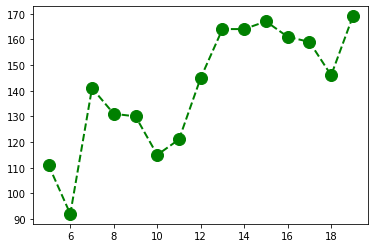

In [40]:
# KNN    k = 5 to 15
# plotting error_rate vs k
k = np.arange(5, 20, 1)
k_error = np.array([0] * len(k))
for i in k:
  y_pred = np.array([ knn_predict(i, X_train, x, y_train) for x in X_test ])
  error = get_error(y_test, y_pred)
  k_error[i - 5] = error

fig, ax = plt.subplots(1)
ax.plot(k, k_error, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)